# **NYC PROPERTY SALES**

# Introduction

New York City is known for its thriving real estate market, attracting buyers and investors from all over the world. The city's diverse neighborhoods offer a range of properties for sale, from high-end luxury apartments to charming townhouses and everything in between. Whether you're looking for a primary residence or a lucrative investment opportunity, the NYC property sales market can be an exciting and dynamic place to explore.

This project is about discovering New York City real estate by looking at a year's worth of raw transaction records and building models to predict sale value.

# Table of Contents

**I) DATA PREPARATION**

1. Import libraries

2. Read data

3. Construct variables

**II) DATA PREPROCESSING AND EXPLORATORY DATA ANALYSIS**

4. Data cleaning

5. Graph for insights

6. Remove outliers

7. Feature engineering

**III) PREDICTING SALE PRICE**

**Without Standard Scaling:**

8. Split data

9. Model training

10. Hyperparameter tuning

11. Feature Importance

**With Standard Scaling:**

12. Feature Scaling

13. Split data

14. Model training

15. Hyperparameter tuning

16. Feature Importance

# **I) DATA PREPARATION**

# Import libraries

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
sns.set()
rand_state=1000

# Read data

About the data set: https://www.kaggle.com/datasets/new-york-city/nyc-property-sales

This dataset is a record of properties sold in the New York City over a 12-month period from September 2016 to September 2017.

In [4]:
df = pd.read_csv('nyc-rolling-sales.csv')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,7/19/2017 0:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,12/14/2016 0:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,12/9/2016 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,11/17/2016 0:00


# Contruct variables

In [5]:
# contruct month sold and year sold variables
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
df['MONTH SOLD']= (df['SALE DATE']).dt.month
df['YEAR SOLD']= (df['SALE DATE']).dt.year

# construct numerical variables
numeric = ['RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','SALE PRICE', 'YEAR BUILT', 'MONTH SOLD']
for col in numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce') # coercing errors to NaN

# construct categorical variables
categorical = ['BOROUGH','NEIGHBORHOOD','BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT','ZIP CODE','BUILDING CLASS AT TIME OF SALE','TAX CLASS AT TIME OF SALE']
for col in categorical:
    df[col] = df[col].astype("category")

# **II) DATA PREPROCESSING AND EXPLORATORY DATA ANALYSIS**

# Data cleaning

In [6]:
# remove irrelevant columns
df.drop(["Unnamed: 0"], axis=1, inplace=True)
# replace whitespace with NaN
df.replace(' ', np.nan, inplace=True)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,MONTH SOLD,YEAR SOLD
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,NaN,...,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,7,2017
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,NaN,...,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14,12,2016
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,NaN,...,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09,12,2016
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,NaN,...,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,9,2016
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,NaN,...,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,11,2016


Data inspection

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            83810 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       0 non-null      float64       
 7   BUILDING CLASS AT PRESENT       83810 non-null  category      
 8   ADDRESS                         84548 non-null  object        
 9   APARTMENT NUMBER                19052 non-null  object        
 10  ZIP CODE                        84548 non-null  category      
 11  RE

In [8]:
# Percentage of null values in each column
round(df.isna().sum() / len(df) * 100, 2)

BOROUGH                             0.00
NEIGHBORHOOD                        0.00
BUILDING CLASS CATEGORY             0.00
TAX CLASS AT PRESENT                0.87
BLOCK                               0.00
LOT                                 0.00
EASE-MENT                         100.00
BUILDING CLASS AT PRESENT           0.87
ADDRESS                             0.00
APARTMENT NUMBER                   77.47
ZIP CODE                            0.00
RESIDENTIAL UNITS                   0.00
COMMERCIAL UNITS                    0.00
TOTAL UNITS                         0.00
LAND SQUARE FEET                   31.05
GROSS SQUARE FEET                  32.66
YEAR BUILT                          0.00
TAX CLASS AT TIME OF SALE           0.00
BUILDING CLASS AT TIME OF SALE      0.00
SALE PRICE                         17.22
SALE DATE                           0.00
MONTH SOLD                          0.00
YEAR SOLD                           0.00
dtype: float64

<AxesSubplot:>

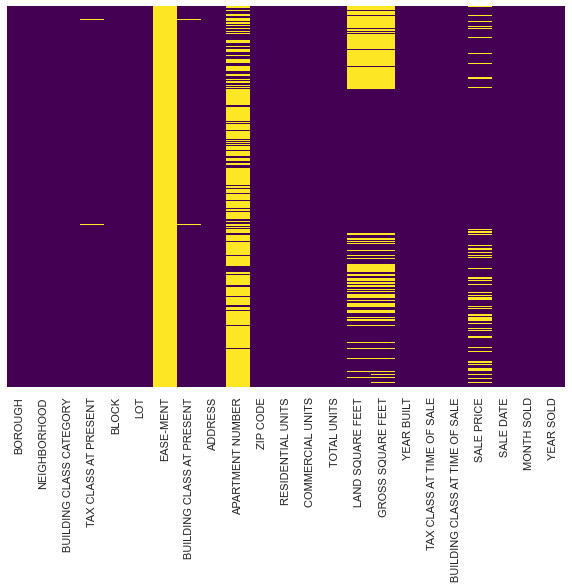

In [9]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
del df['EASE-MENT']
del df['APARTMENT NUMBER']

Drop all missing values

In [11]:
df.dropna(inplace=True)

In [12]:
df[numeric].min()

RESIDENTIAL UNITS    0.0
COMMERCIAL UNITS     0.0
TOTAL UNITS          0.0
LAND SQUARE FEET     0.0
GROSS SQUARE FEET    0.0
SALE PRICE           0.0
YEAR BUILT           0.0
MONTH SOLD           1.0
dtype: float64

1) There are properties which have 0 SQUARE FEET or 0 TOTAL UNITS, which can not exist or the data is wrong

2) Some properties have a SALE PRICE of 0, which can be a transfer of ownership but not actually a sale.

In [13]:
for i in ['TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']:
    df = df[df[i] > 0]

Buildings built in year 0 does not make sense, so let's drop this from the data by only including rows that have YEAR BUILT > 1650. The oldest building in New York City was built around the 1650s so any building that was built before this time is probably not accurate.

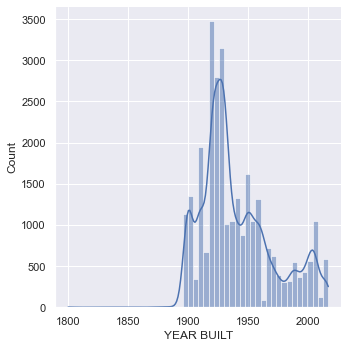

In [14]:
# Most buildings are built between 1900 and 1950
df = df[df['YEAR BUILT'] > 1650]
sns.displot(df['YEAR BUILT'], bins=50, kde=True)

The lowest price for a property in NYC is 10,000 USD. So any thing below this price point must be removed.

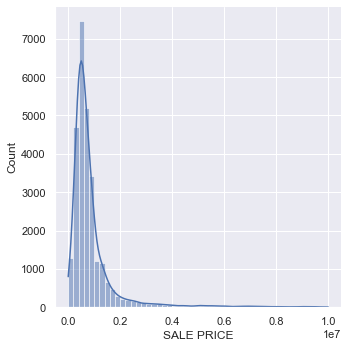

In [15]:
# Sale price is mostly below 2 million
df = df[(df['SALE PRICE'] > 10000) & (df['SALE PRICE'] < 10000000)]
sns.displot(df['SALE PRICE'], bins=50, kde=True)

In [16]:
print(df[numeric].min())

RESIDENTIAL UNITS        0.0
COMMERCIAL UNITS         0.0
TOTAL UNITS              1.0
LAND SQUARE FEET       200.0
GROSS SQUARE FEET      120.0
SALE PRICE           10001.0
YEAR BUILT            1800.0
MONTH SOLD               1.0
dtype: float64


In [17]:
# Delete the duplicated values
print(sum(df.duplicated(df.columns)))
df = df.drop_duplicates(df.columns)

98


# Graph for insights

In [18]:
pd.crosstab(df['MONTH SOLD'],df['YEAR SOLD'])

YEAR SOLD,2016,2017
MONTH SOLD,,
1,0,2223
2,0,2117
3,0,2473
4,0,2111
5,0,2371
6,0,2640
7,0,2172
8,0,1809
9,2608,0


Text(0.5, 1.0, 'COUNT OF SALES PER MONTH')

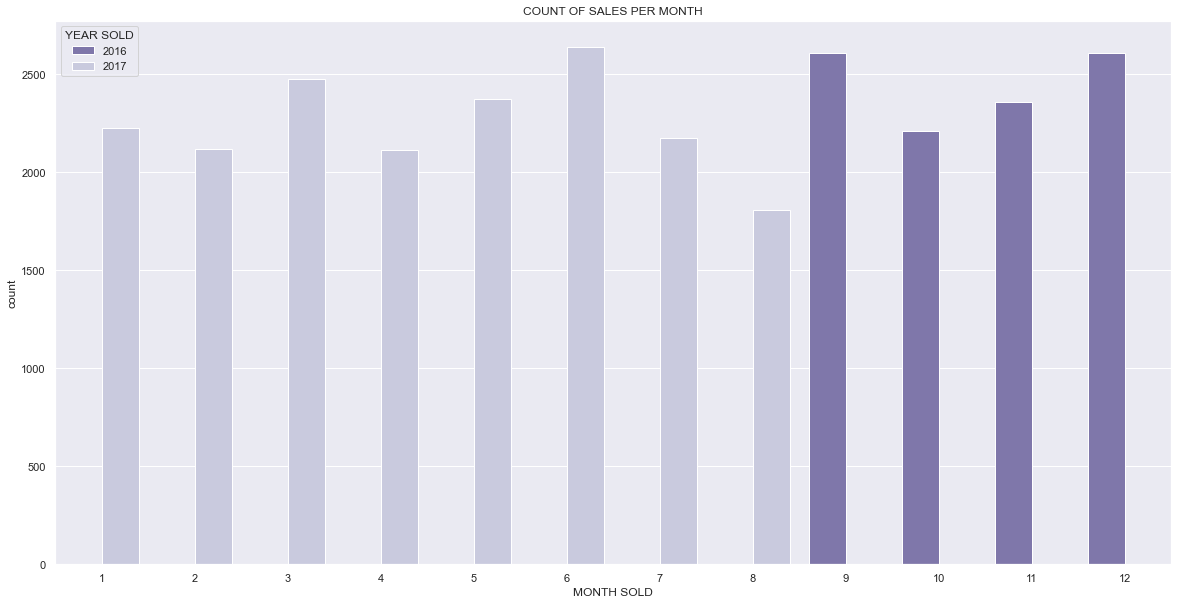

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(x='MONTH SOLD', hue='YEAR SOLD', data=df, palette='Purples_r')
plt.title('COUNT OF SALES PER MONTH')

Text(0.5, 1.0, 'AVERAGE SALE PRICE FOR EACH BUILDING CLASS CATEGORY')

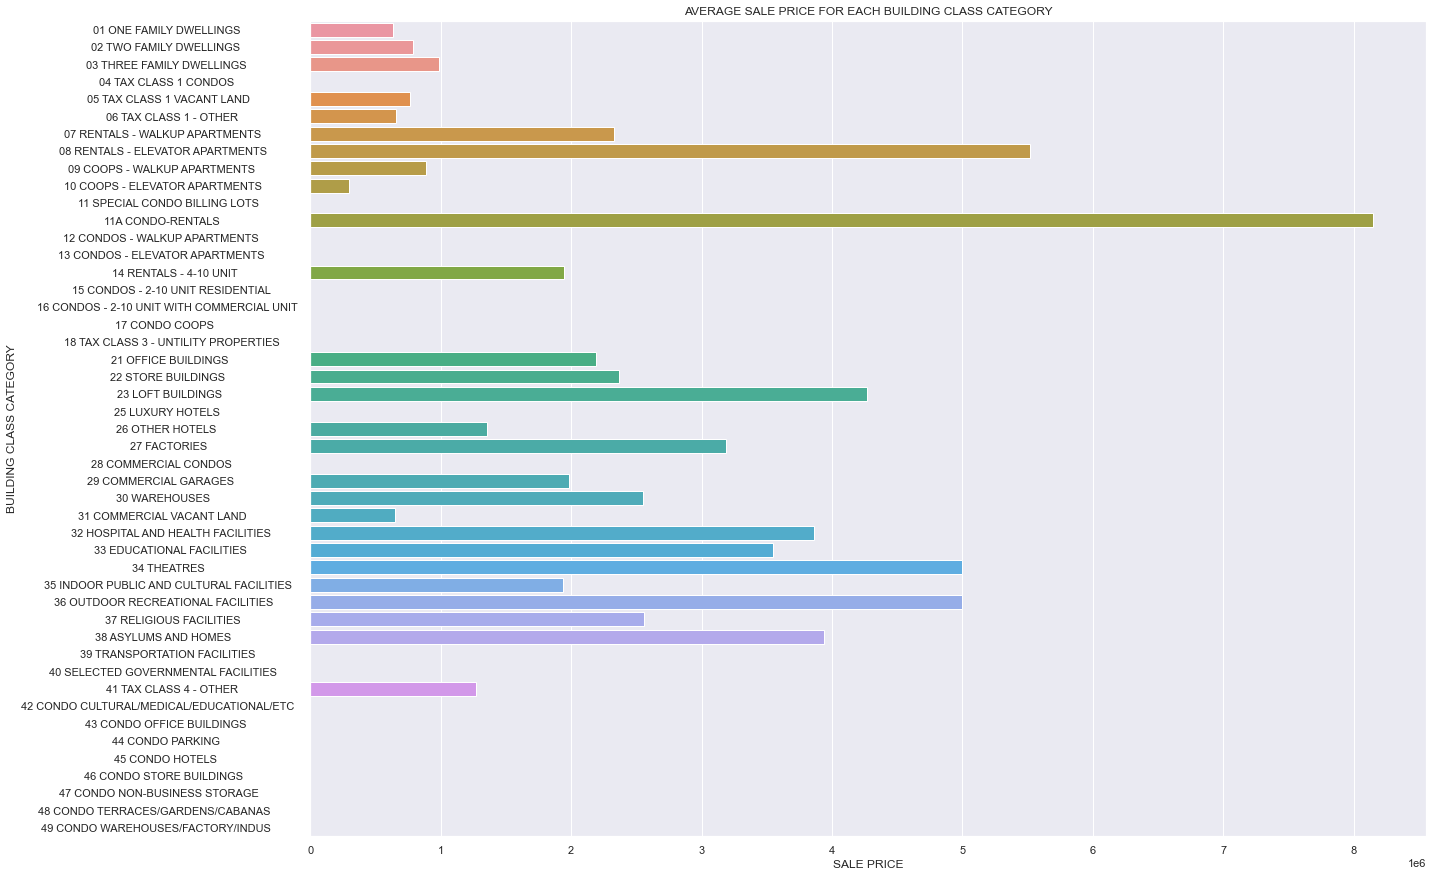

In [20]:
data = df[["BUILDING CLASS CATEGORY", "SALE PRICE"]].groupby(['BUILDING CLASS CATEGORY'], as_index=False).mean()
plt.figure(figsize=(20,15))
sns.barplot(x='SALE PRICE', y='BUILDING CLASS CATEGORY', data=data, orient = 'h')
plt.title('AVERAGE SALE PRICE FOR EACH BUILDING CLASS CATEGORY')

Tax class: every property in the city is assigned to one of four tax classes (Classes 1, 2, 3, and 4), based on the use of the property.

*   Class 1: Includes most residential property of up to three units (such as one-, two-, and three-family homes and small stores or offices with one or two attached apartments), vacant land that is zoned for residential use, and most condominiums that are not more than three stories.
*   Class 2: Includes all other property that is primarily residential, such as cooperatives and condominiums.
*   Class 3: Includes property with equipment owned by a gas, telephone or electric company.
*   Class 4: Includes all other properties not included in class 1,2, and 3, such as offices, factories, warehouses, garage buildings, etc.

Properties with different tax classes are often subject to different property tax rates, and this can impact the cost of owning the property.

<AxesSubplot:xlabel='TAX CLASS AT TIME OF SALE'>

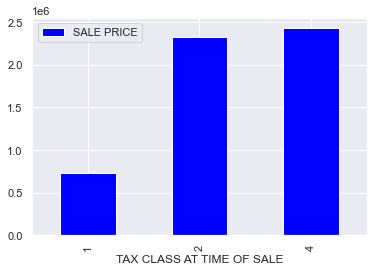

In [21]:
# Average sale price for each tax class at time of sale
df.pivot_table(index='TAX CLASS AT TIME OF SALE', values='SALE PRICE').plot(kind='bar', color='blue')

<AxesSubplot:xlabel='TAX CLASS AT PRESENT'>

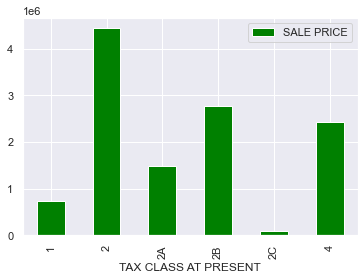

In [22]:
# Average sale price for each tax class at present
df.pivot_table(index='TAX CLASS AT PRESENT', values='SALE PRICE').plot(kind='bar', color='green')

Text(0.5, 1.0, 'AVERAGE SALE PRICE IN THE MOST COMMON NEIGHBORHOODS')

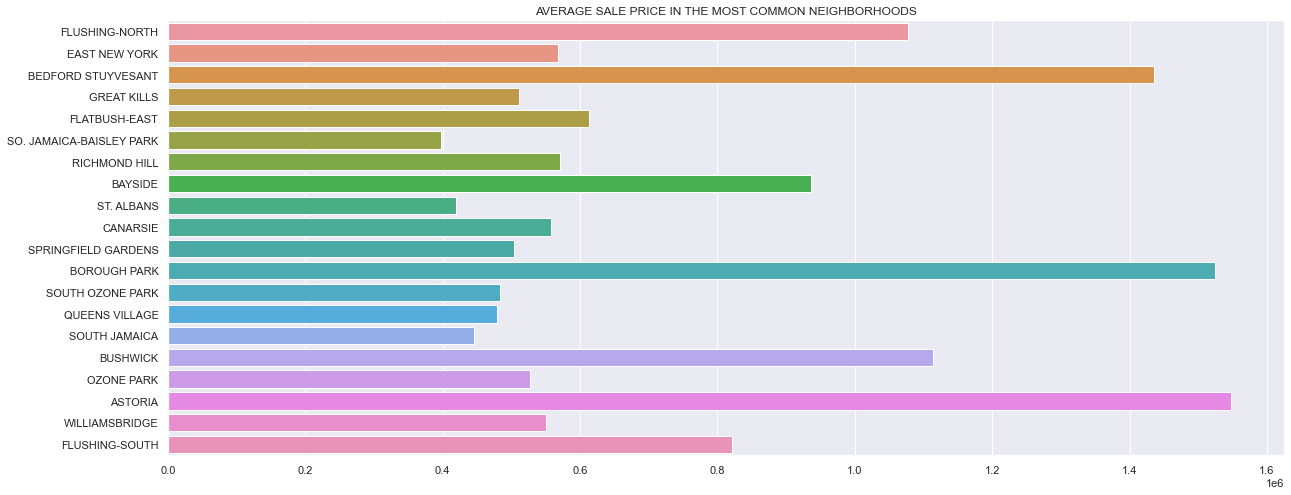

In [23]:
from collections import Counter
NEIGHBORHOOD = list(dict(Counter(df['NEIGHBORHOOD']).most_common(20)).keys())

avg_sale_prices = []
for i in NEIGHBORHOOD:
    avg_sale_prices.append(np.mean(df[df['NEIGHBORHOOD'] == i]['SALE PRICE']))

plt.figure(figsize=(20,8))
sns.barplot(x= avg_sale_prices, y= NEIGHBORHOOD)
plt.title('AVERAGE SALE PRICE IN THE MOST COMMON NEIGHBORHOODS')

# Dealing with outliers

Box plots for numerical variables

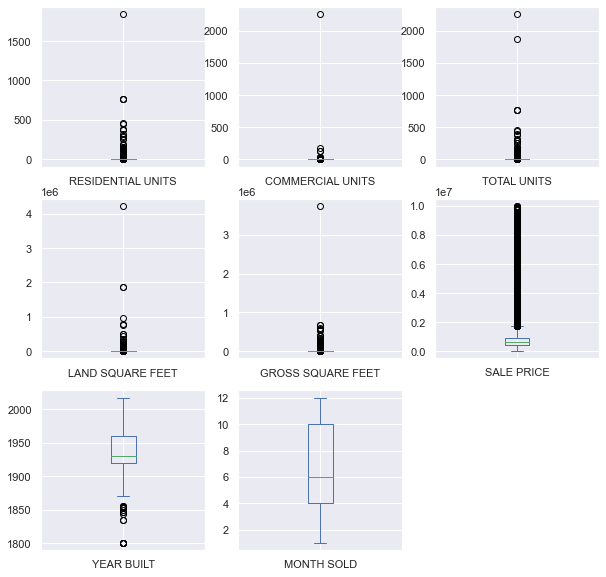

In [24]:
df[numeric].plot.box(subplots=True, layout=(3,3), figsize=(10, 10))
plt.show()

Remove outliers

In [25]:
# Mark outliers for all columns then remove them all at once
for col in numeric:
    Q1, Q3 = np.percentile(df[col], [25,75])
    IQR = Q3 - Q1
    df.loc[Q1 - 1.5 * IQR > df[col], col] = np.nan
    df.loc[Q3 + 1.5 * IQR < df[col], col] = np.nan

df.dropna(inplace=True)
df = df.reset_index(drop=True)

Box plots for numerical variables after removing outliers

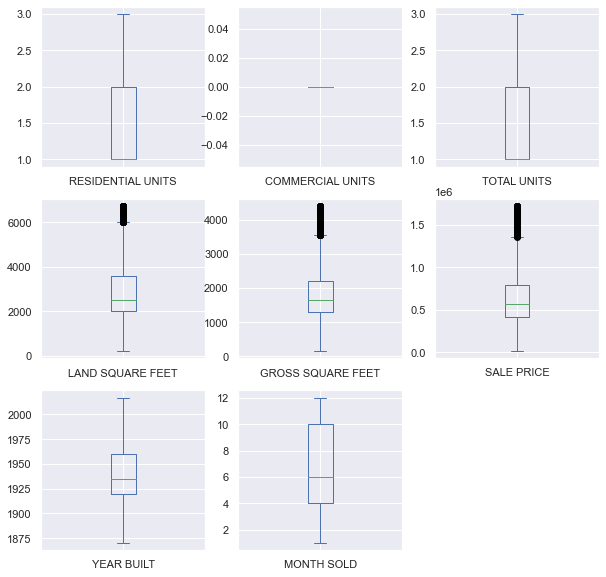

In [26]:
df[numeric].plot.box(subplots=True, layout=(3,3), figsize=(10, 10))
plt.show()

BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

In [27]:
df['BOROUGH'] = df['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})

Text(0.5, 1.0, 'AVERAGE SALE PRICE ON EACH BOROUGH')

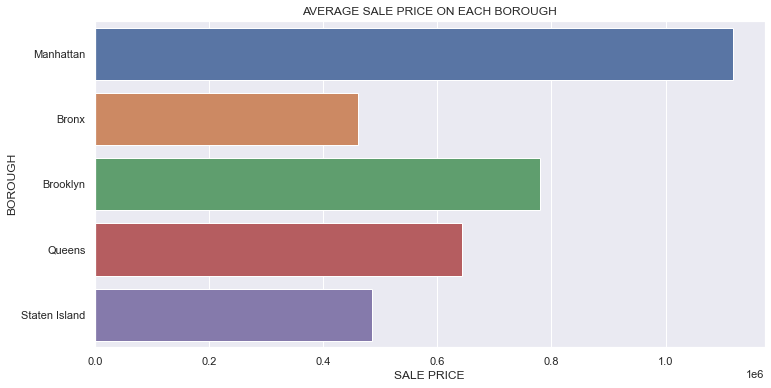

In [28]:
df_bar = df[['BOROUGH', 'SALE PRICE']].groupby(by='BOROUGH').mean().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x = 'SALE PRICE', y = 'BOROUGH', data = df_bar)
plt.title('AVERAGE SALE PRICE ON EACH BOROUGH')

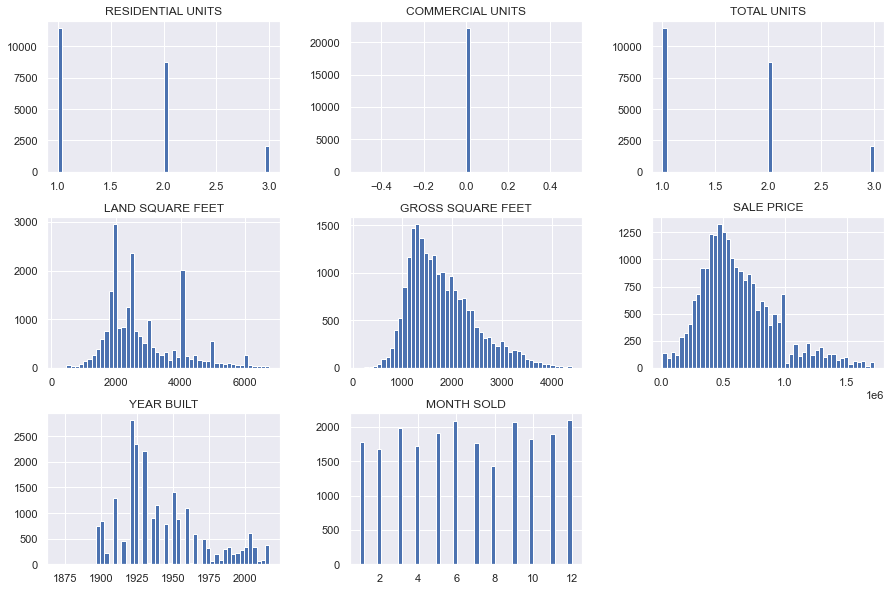

In [29]:
df[numeric].hist(bins=50,figsize=(15,10))
plt.show()

# Feature engineering

One hot encoding categorical columns

In [30]:
# Select the variables to be one-hot encoded
one_hot_features = ['BOROUGH', 'BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','TAX CLASS AT TIME OF SALE']

In [31]:
# Convert categorical variables into dummy/indicator variables (i.e. one-hot encoding).
one_hot_encoded = pd.get_dummies(df[one_hot_features])

1 represents presence of a categorical value. 0 represents absence of a categorical value.

In [32]:
one_hot_encoded

,BOROUGH_Manhattan,BOROUGH_Bronx,BOROUGH_Brooklyn,BOROUGH_Queens,BOROUGH_Staten Island,BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS,BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS,BUILDING CLASS CATEGORY_05 TAX CLASS 1 VACANT LAND,...,TAX CLASS AT PRESENT_2,TAX CLASS AT PRESENT_2A,TAX CLASS AT PRESENT_2B,TAX CLASS AT PRESENT_2C,TAX CLASS AT PRESENT_3,TAX CLASS AT PRESENT_4,TAX CLASS AT TIME OF SALE_1,TAX CLASS AT TIME OF SALE_2,TAX CLASS AT TIME OF SALE_3,TAX CLASS AT TIME OF SALE_4
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22212,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
22213,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
22214,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
22215,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [33]:
# Replacing categorical columns with dummy columns
df = df.drop(one_hot_features, axis=1)
df = pd.concat([df, one_hot_encoded], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22217 entries, 0 to 22216
Data columns (total 83 columns):
 #   Column                                                                Non-Null Count  Dtype         
---  ------                                                                --------------  -----         
 0   NEIGHBORHOOD                                                          22217 non-null  category      
 1   BLOCK                                                                 22217 non-null  int64         
 2   LOT                                                                   22217 non-null  int64         
 3   BUILDING CLASS AT PRESENT                                             22217 non-null  category      
 4   ADDRESS                                                               22217 non-null  object        
 5   ZIP CODE                                                              22217 non-null  category      
 6   RESIDENTIAL UNITS                     

In [34]:
# We will not use these features for model training
df.drop(columns=['NEIGHBORHOOD', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'ZIP CODE', 'BUILDING CLASS AT TIME OF SALE', 'SALE DATE', 'YEAR SOLD'], inplace=True)

In [35]:
# remove white spaces in column names
df.columns = df.columns.str.strip()

# **III) PREDICTING SALE PRICE**

We will only use about 22k observations out of the original data to train and test models

# Without Standard Scaling:

## Split data

Split the dataset into train set and test set with ratio 0.8:0.2

In [36]:
from sklearn.model_selection import train_test_split
X = df.drop('SALE PRICE', axis = 1)
y = df['SALE PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
# Training set
X_train.shape , y_train.shape

((17773, 73), (17773,))

In [38]:
# Testing set
X_test.shape , y_test.shape

((4444, 73), (4444,))

## Model training

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [40]:
def RMSE(y_test,y_pred):
    return np.sqrt(mean_squared_error(y_test,y_pred))

In [41]:
knn_rmse_before = 0
rf_rmse_before = 0

algorithms = [LinearRegression(), Lasso(), Ridge(), KNeighborsRegressor(), RandomForestRegressor(n_estimators=10)]

for algo in algorithms:
    model = algo.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    algo_name = str(algo).split('(')[0]
    print("=== " + algo_name + " ===")
    mae = round(mean_absolute_error(y_test, y_pred), 2)
    mse = round(mean_squared_error(y_test, y_pred), 2)
    rmse = round(RMSE(y_test, y_pred), 2)
    print("Mean absolute error (MAE):", mae)
    print("Mean squared error (MSE):", mse)
    print("Root mean squared error (RMSE):", rmse)
    print()
    if algo_name == 'KNeighborsRegressor':
        knn_rmse_before = rmse
    if algo_name == 'RandomForestRegressor':
        rf_rmse_before = rmse

=== LinearRegression ===
Mean absolute error (MAE): 195138.39
Mean squared error (MSE): 67832549148.13
Root mean squared error (RMSE): 260446.83



C:\Users\dellxps\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 616889654771096.5, tolerance: 174555586129.05243
  model = cd_fast.enet_coordinate_descent(


=== Lasso ===
Mean absolute error (MAE): 195127.86
Mean squared error (MSE): 67831513768.87
Root mean squared error (RMSE): 260444.84

=== Ridge ===
Mean absolute error (MAE): 195129.95
Mean squared error (MSE): 67826784116.72
Root mean squared error (RMSE): 260435.76

=== KNeighborsRegressor ===
Mean absolute error (MAE): 222744.54
Mean squared error (MSE): 88995789659.72
Root mean squared error (RMSE): 298321.62

=== RandomForestRegressor ===
Mean absolute error (MAE): 189613.28
Mean squared error (MSE): 68791512468.93
Root mean squared error (RMSE): 262281.36



Lasso, Ridge, and Linear Regression have RMSE scores that are almost equal to each other. These algorithms all have better RMSE scores (lower) than KNN and RandomForestRegressor in this case.



## Hyperparameter tuning

Documentation for scoring parameter: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

The following cell searches the best hyperparameters for KNeighborsRegressor

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'leaf_size': [15, 20]}
knn = KNeighborsRegressor()

knn_tuned = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)
knn_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'leaf_size': [15, 20], 'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='neg_root_mean_squared_error', verbose=1)

In [43]:
print("The estimator that gave the highest score:", knn_tuned.best_estimator_)
print('KNeighborsRegressor RMSE before fine-tuning:', knn_rmse_before)
y_pred = knn_tuned.best_estimator_.fit(X_train, y_train).predict(X_test)
print("KNeighborsRegressor RMSE after fine-tuning:", round(RMSE(y_test, y_pred), 2))

The estimator that gave the highest score: KNeighborsRegressor(leaf_size=15, n_neighbors=9, weights='distance')
KNeighborsRegressor RMSE before fine-tuning: 298321.62
KNeighborsRegressor RMSE after fine-tuning: 288986.9


The following cell searches the best hyperparameters for RandomForestRegressor

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # first, try 12 combinations of hyperparameter values
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then, try 6 combinations of hyperparameter values
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()

forest_tuned = GridSearchCV(estimator=forest_reg, cv=3, param_grid=param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)
forest_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_root_mean_squared_error', verbose=1)

In [45]:
print("The estimator that gave the highest score:", forest_tuned.best_estimator_)
print("RandomForestRegressor RMSE before fine-tuning:", rf_rmse_before)
y_pred = forest_tuned.best_estimator_.fit(X_train, y_train).predict(X_test)
print("RandomForestRegressor RMSE after fine-tuning:", round(RMSE(y_test, y_pred), 2))

The estimator that gave the highest score: RandomForestRegressor(max_features=2, n_estimators=30)
RandomForestRegressor RMSE before fine-tuning: 262281.36
RandomForestRegressor RMSE after fine-tuning: 254316.28


We can see that the RMSE for both models have decreased after fine-tuning

## Feature importance

Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

A higher rank means the feature will have a larger effect on the model that is used to predict SALE PRICE.

Text(0.5, 1.0, 'Feature Importance Rankings')

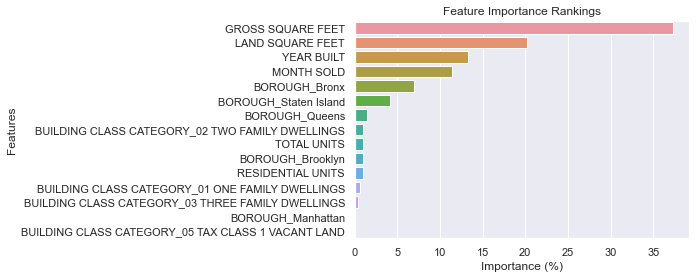

In [46]:
model = RandomForestRegressor().fit(X, y)
importance = [x * 100 for x in model.feature_importances_.tolist()]

df2 = pd.DataFrame(zip(X.columns, importance), columns=["Features","Importance (%)"]).sort_values("Importance (%)", ascending = False)
sns.barplot(x="Importance (%)", y="Features", data=df2.head(15))
plt.title('Feature Importance Rankings')

GROSS SQUARE FEET, LAND SQUARE FEET, and YEAR BUILT were the most important features determining the SALE PRICE.

# With Standard Scaling:

## Feature Scaling

For machine learning models to interpret numerical features on the same scale, we need to perform feature scaling.

StandardScaler is one of the possible feature scaling techniques. This is also called feature scaling through standardization or Z-score normalization.

The transformation of each feature is done by subtracting the mean from the value and dividing by standard deviation.

z = (x - mean) / std.

In [47]:
from sklearn.preprocessing import StandardScaler
df[numeric] = StandardScaler().fit_transform(df[numeric])

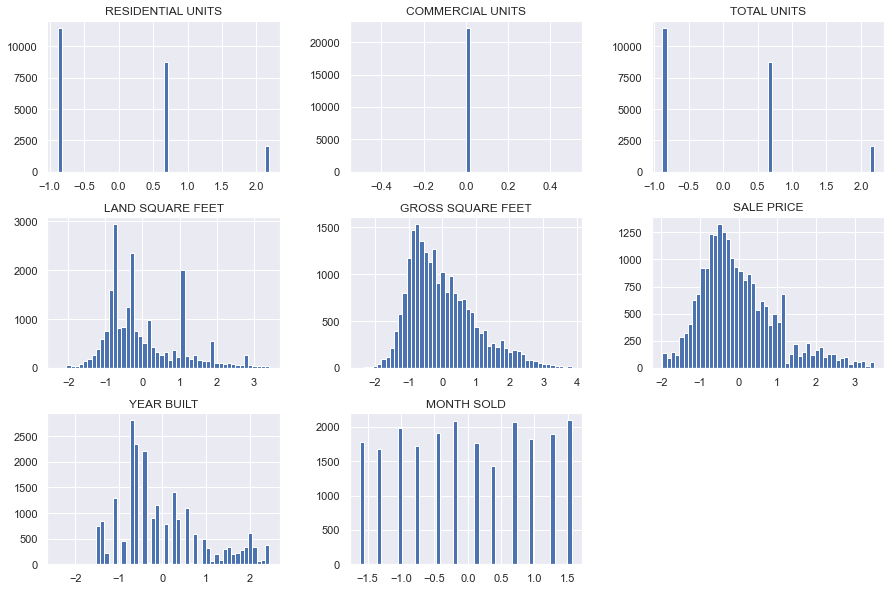

In [48]:
df[numeric].hist(bins=50, figsize=(15,10))
plt.show()

The rescaled feature will have a mean of 0 and a standard deviation of 1.

In [49]:
round(df[numeric].mean())

RESIDENTIAL UNITS    0.0
COMMERCIAL UNITS     0.0
TOTAL UNITS          0.0
LAND SQUARE FEET     0.0
GROSS SQUARE FEET    0.0
SALE PRICE          -0.0
YEAR BUILT          -0.0
MONTH SOLD          -0.0
dtype: float64

In [50]:
df[numeric].std(ddof=0)

RESIDENTIAL UNITS    1.0
COMMERCIAL UNITS     0.0
TOTAL UNITS          1.0
LAND SQUARE FEET     1.0
GROSS SQUARE FEET    1.0
SALE PRICE           1.0
YEAR BUILT           1.0
MONTH SOLD           1.0
dtype: float64

In [51]:
# All values of COMMERCIAL UNITS are 0, so its standard deviation is 0
df['COMMERCIAL UNITS'].value_counts()

0.0    22217
Name: COMMERCIAL UNITS, dtype: int64

## Split data

In [52]:
from sklearn.model_selection import train_test_split
X = df.drop('SALE PRICE', axis = 1)
y = df['SALE PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [53]:
# Training set
X_train.shape , y_train.shape

((17773, 73), (17773,))

In [54]:
# Testing set
X_test.shape , y_test.shape

((4444, 73), (4444,))

## Model training

In [55]:
# installed xgboost using 'conda install -c anaconda py-xgboost' in anaconda cmd
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

knn_rmse_before = 0
rf_rmse_before = 0

algorithms = [DecisionTreeRegressor(), XGBRegressor(), GradientBoostingRegressor(), KNeighborsRegressor(), RandomForestRegressor(n_estimators=10)]

for algo in algorithms:
    model = algo.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    algo_name = str(algo).split('(')[0]
    print("=== " + algo_name + " ===")
    mae = round(mean_absolute_error(y_test, y_pred), 2)
    mse = round(mean_squared_error(y_test, y_pred), 2)
    rmse = round(RMSE(y_test, y_pred), 2)
    print("Mean absolute error (MAE):", mae)
    print("Mean squared error (MSE):", mse)
    print("Root mean squared error (RMSE):", rmse)
    print()
    if algo_name == 'KNeighborsRegressor':
        knn_rmse_before = rmse
    if algo_name == 'RandomForestRegressor':
        rf_rmse_before = rmse

=== DecisionTreeRegressor ===
Mean absolute error (MAE): 0.8
Mean squared error (MSE): 1.23
Root mean squared error (RMSE): 1.11

=== XGBRegressor ===
Mean absolute error (MAE): 0.6
Mean squared error (MSE): 0.68
Root mean squared error (RMSE): 0.82

=== GradientBoostingRegressor ===
Mean absolute error (MAE): 0.6
Mean squared error (MSE): 0.67
Root mean squared error (RMSE): 0.82

=== KNeighborsRegressor ===
Mean absolute error (MAE): 0.64
Mean squared error (MSE): 0.79
Root mean squared error (RMSE): 0.89

=== RandomForestRegressor ===
Mean absolute error (MAE): 0.62
Mean squared error (MSE): 0.74
Root mean squared error (RMSE): 0.86



## Hyperparameter tuning

The following cell searches the best hyperparameters for KNeighborsRegressor

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'leaf_size': [15, 20]}
knn = KNeighborsRegressor()

knn_tuned = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)
knn_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'leaf_size': [15, 20], 'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='neg_root_mean_squared_error', verbose=1)

In [57]:
print("The estimator that gave the highest score:", knn_tuned.best_estimator_)
print('KNeighborsRegressor RMSE before fine-tuning:', knn_rmse_before)
y_pred = knn_tuned.best_estimator_.fit(X_train, y_train).predict(X_test)
print("KNeighborsRegressor RMSE after fine-tuning:", round(RMSE(y_test, y_pred), 2))

The estimator that gave the highest score: KNeighborsRegressor(leaf_size=15, n_neighbors=9)
KNeighborsRegressor RMSE before fine-tuning: 0.89
KNeighborsRegressor RMSE after fine-tuning: 0.85


The following cell searches the best hyperparameters for RandomForestRegressor

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # first, try 12 combinations of hyperparameter values
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then, try 6 combinations of hyperparameter values
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()

forest_tuned = GridSearchCV(estimator=forest_reg, cv=3, param_grid=param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)
forest_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_root_mean_squared_error', verbose=1)

In [59]:
print("The estimator that gave the highest score:", forest_tuned.best_estimator_)
print("RandomForestRegressor RMSE before fine-tuning:", rf_rmse_before)
y_pred = forest_tuned.best_estimator_.fit(X_train, y_train).predict(X_test)
print("RandomForestRegressor RMSE after fine-tuning:", round(RMSE(y_test, y_pred), 2))

The estimator that gave the highest score: RandomForestRegressor(max_features=6, n_estimators=30)
RandomForestRegressor RMSE before fine-tuning: 0.86
RandomForestRegressor RMSE after fine-tuning: 0.85


We have achieved a slight improvement in RMSE with the optimized model.

## Feature importance:

Text(0.5, 1.0, 'Feature Importance Rankings')

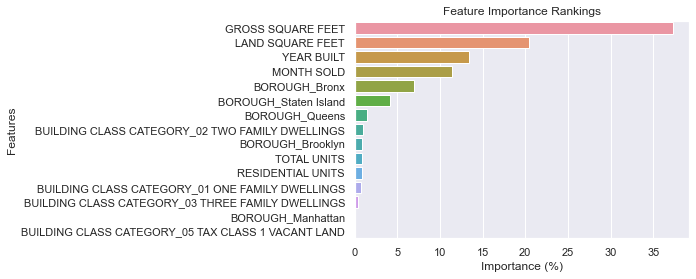

In [60]:
model = RandomForestRegressor().fit(X, y)
importance = [x * 100 for x in model.feature_importances_.tolist()]

df2 = pd.DataFrame(zip(X.columns, importance), columns=["Features","Importance (%)"]).sort_values("Importance (%)", ascending = False)
sns.barplot(x="Importance (%)", y="Features", data=df2.head(15))
plt.title('Feature Importance Rankings')

It is observable that we have almost exactly similar graphs for feature importance rankings whether it is with standard scaling or without standard scaling. Here, GROSS SQUARE FEET, LAND SQUARE FEET, and YEAR BUILT were still the most important features determining the SALE PRICE.